# Best Fitted Curve by using the Ordinary Least Squere Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
no_of_data_points = 15
m = no_of_data_points

In [3]:
# Data Set
X = [15,23,18,23,24,22,22,19,19,16,24,11,24,16,23]
Y = [49,63,58,60,58,61,60,63,60,52,62,30,59,49,68]
len(X) == len(Y) == 15

True

In [4]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print(X_mean,Y_mean)

19.933333333333334 56.8


In [5]:
def OLSM(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    X_var = []

    cov_xy = []
    
    for i in range(0,m):
        cov_xy.append((X[i]-X_mean)*(Y[i]-Y_mean))
        X_var.append( (X[i] - X_mean)**2 )
    cov = np.sum(cov_xy)
    var = np.sum(X_var)
    slope = cov/var
    intercept = Y_mean - slope*X_mean
    return (slope,intercept)

In [6]:
slope, intercept = OLSM(X,Y)

In [7]:
slope

1.8939482961222098

In [8]:
intercept

19.047297297297284

In [9]:
def BestFittedCurve(x,slope,intercept):
    return (x*slope + intercept)

In [10]:
Y_pred = []
for i in range(0,m):
    Y_pred.append(BestFittedCurve(X[i],slope,intercept))
Y_pred    

[47.45652173913043,
 62.60810810810811,
 53.138366627497064,
 62.60810810810811,
 64.50205640423033,
 60.7141598119859,
 60.7141598119859,
 55.03231492361927,
 55.03231492361927,
 49.35047003525264,
 64.50205640423033,
 39.88072855464159,
 64.50205640423033,
 49.35047003525264,
 62.60810810810811]

In [11]:
def SSE(Y,Y_pred):
    error = 0
    temp = []
    for i in range(0,m):
        temp.append( (Y[i] - Y_pred[i])**2 )
    error = np.sum(temp)
    return error

In [12]:
SSE(Y,Y_pred)

334.38102232667484

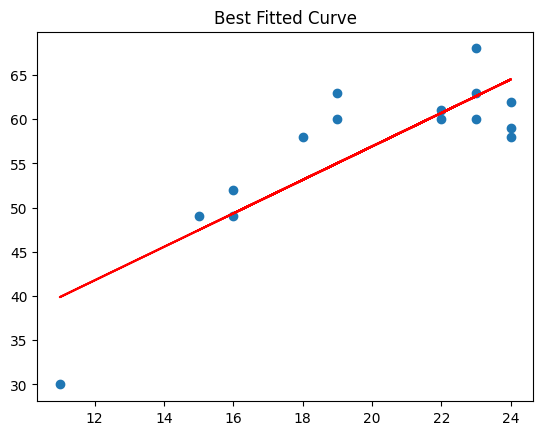

In [13]:
plt.plot(X,Y_pred,'red')
plt.title('Best Fitted Curve')
plt.scatter(X,Y)
plt.show()

# Best Fitted Curve by using the Gredient Decent Method 

In [14]:
# Data Set
X = [15,23,18,23,24,22,22,19,19,16,24,11,24,16,23]
Y = [49,63,58,60,58,61,60,63,60,52,62,30,59,49,68]
len(X) == len(Y) == 15

True

In [15]:
def BestFittedCurve(x,slope,intercept):
    return (x*slope + intercept)

In [90]:
def GD_Method(X,Y):
    slope = 2
    intercept = 2
    init_intercept = intercept
    lemda = 0.001
    while(True):
        temp = []
        for i in range(m):
            temp.append( (BestFittedCurve(X[i],slope,intercept) - Y[i]) )
        err = lemda*(1/m)*np.sum(temp)
        intercept = intercept - err
        del temp
        if( abs(err) < 0.000000000001):
            break
    #print(intercept)
    while(True):
        temp = []
        for i in range(m):
            temp.append( ((BestFittedCurve(X[i], slope,intercept) - Y[i])*X[i]) )
        err = lemda*(1/m)*np.sum(temp)
        slope = slope - err
        if( abs(err) <  0.0000000001):
            break
        del temp

    return slope,intercept
        
        

In [91]:
print(GD_Method(X,Y))
new_slope,new_intercept = GD_Method(X,Y)

(1.99611012351811, 16.93333333233517)


In [92]:
Y_pred = []
for i in range(0,m):
    Y_pred.append(BestFittedCurve(X[i],new_slope,new_intercept))
Y_pred  

[46.87498518510682,
 62.8438661732517,
 52.863315555661146,
 62.8438661732517,
 64.8399762967698,
 60.84775604973359,
 60.84775604973359,
 54.85942567917927,
 54.85942567917927,
 48.87109530862493,
 64.8399762967698,
 38.89054469103438,
 64.8399762967698,
 48.87109530862493,
 62.8438661732517]

In [93]:
def SSE(Y,Y_pred):
    error = 0
    temp = []
    for i in range(0,m):
        temp.append( (Y[i] - Y_pred[i])**2 )
    error = np.sum(temp)
    return error

In [94]:
SSE(Y,Y_pred)

336.83971697159404

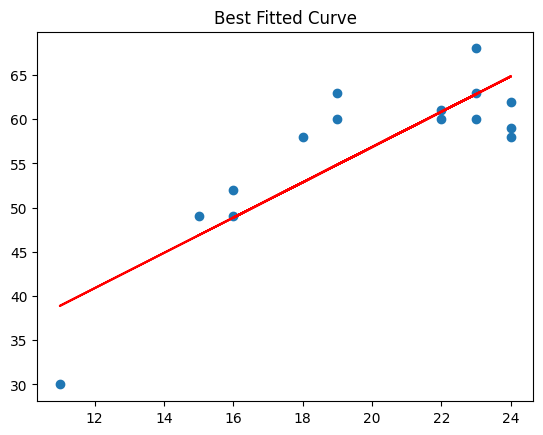

In [95]:
plt.plot(X,Y_pred,'red')
plt.title('Best Fitted Curve')
plt.scatter(X,Y)
plt.show()